# Clasificación de rayos cósmicos

Calculo el valor crítico del observable X para clasificar rayos cósmicos. Calculo la precisión y el poder de la clasificación. Considero tres casos para el hierro: μ₁=650 (caso realista), 610 (hierro y protón bien separados) y 700 (hierro y protrón muy mezclados)

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 

## Hipótesis nula: Protón

In [11]:
mu0 = 730
sigma0 = 40
null_hypothesis = scipy.stats.norm(loc=mu0, scale=sigma0)

## Hipótesis alternativa: Hierro

In [12]:
mu1 = 610  # hierro y protón bien separados
#mu1 = 700 # hierro y protón muy mezclados
# mu1 = 650   # realista: caso intermedio
sigma1 = 20
alternative_hypothesis = scipy.stats.norm(loc=mu1, scale=sigma1)

## Figuras PDFs y P(error)

In [13]:
# espacio lineal para valores de X
xmax = np.linspace(mu1-3*sigma1, mu0+3*sigma0, 256)

In [14]:
xmax_crit = (sigma0 * mu1 + sigma1 * mu0 ) / (sigma0+sigma1)
xmax_crit

650.0

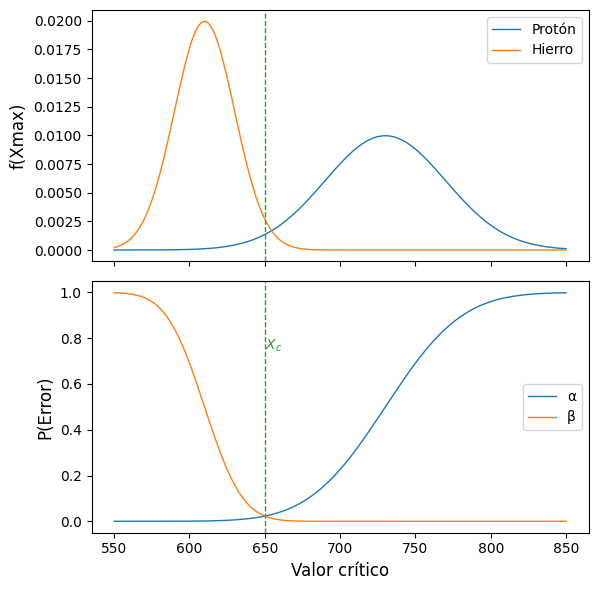

In [16]:
fig = plt.figure(figsize=(6,6))
ax1, ax2 = fig.subplots(2, sharex=True)
ax1.set_ylabel("f(Xmax)")
ax2.set_xlabel("Xmax")
ax2.set_ylabel("P(Error)")

# Plot superior: PDF de las hipótesis nula y alternativa
ax1.plot(xmax, null_hypothesis.pdf(xmax), label="Protón")
ax1.plot(xmax, alternative_hypothesis.pdf(xmax), label="Hierro")
ax1.legend()

# Plot inferior: probabilidad de error de las hipótesis nula y alternativa 
ax2.plot(xmax, null_hypothesis.cdf(xmax), label="α")
ax2.plot(xmax, alternative_hypothesis.sf(xmax), label="β")
ax2.legend()

# Linea vertical en el valor crítico de Xmax en ambos plots 
ax1.axvline(xmax_crit, color='tab:green', ls='--')
ax2.axvline(xmax_crit, color='tab:green', ls='--')
ax2.text(xmax_crit, 0.75, '$X_c$', color='tab:green', horizontalalignment='left')

fig.tight_layout()
plt.show()

## Precisión de la clasificación

Separación de las medias de las hipótesis nula y alternativa relativa a las deviaciones estándares respectivas

In [17]:
a = (mu0-mu1) / (sigma0+sigma1)
a

2.0

## Probabilidad de clasificar incorrectamente

La significancia α es la probabilidad de cometer el error de clasificar a un protón como hierro

In [19]:
alpha = scipy.stats.norm.sf(a)
print(f"Probabilidad de error del tipo I - Significancia: α = {alpha}")

Probabilidad de error del tipo I - Significancia: α = 0.022750131948179195


Beta es la probabilidad de cometer el error de clasificar a un hierro como protón

In [20]:
beta = alpha
print(f"Probabilidad de error del tipo II: β = {beta}")

Probabilidad de error del tipo II: β = 0.022750131948179195


## Parámetro de la clasificación 

In [ ]:
La precisión es la probabilidad de clasificar correctamente a un protón como protón

In [21]:
precision = 1 - alpha
print(f"Precisión de la clasificación: {100*precision:.1f}%")

Precisión de la clasificación: 97.7%


In [ ]:
El poder es la probabilidad de clasificar correctamente a un hierro como hierro

In [22]:
poder = 1 - beta
print(f"Poder de la clasificación: {100*poder:.1f}%")

Poder de la clasificación: 97.7%
